In [1]:
import rule_extention
import pychrono as chrono


from control_optimisation import (create_grab_criterion_fun, create_traj_fun,
                                  get_object_to_grasp)
from rostok.criterion.flags_simualtions import (FlagMaxTime, FlagNotContact,
                                                FlagSlipout)
from rostok.trajectory_optimizer.control_optimizer import (
    ConfigRewardFunction, ControlOptimizer)
from rostok.utils.search_manager import SearchManager

manager = SearchManager.get_instance()
rule_vocabulary, node_features = rule_extention.init_extension_rules()
manager.rule_vocabulary = rule_vocabulary


GAIT = 2.5
WEIGHT = [3, 1, 1, 2]

cfg = ConfigRewardFunction()
cfg.bound = (2, 10)
cfg.iters = 5
cfg.sim_config = {"Set_G_acc": chrono.ChVectorD(0, 0, 0)}
cfg.time_step = 0.005
cfg.time_sim = 2
cfg.flags = [FlagMaxTime(2), FlagNotContact(1), FlagSlipout(0.5, 0.5)]
"""Wraps function call"""

criterion_callback = create_grab_criterion_fun(node_features, GAIT, WEIGHT)
traj_generator_fun = create_traj_fun(cfg.time_sim, cfg.time_step)

cfg.criterion_callback = criterion_callback
cfg.get_rgab_object_callback = get_object_to_grasp
cfg.params_to_timesiries_callback = traj_generator_fun

manager.optimizer_config = cfg
manager.create_optimizer()

In [1]:
list([5.4])

[5.4]

: 

: 

In [2]:
import matplotlib.pyplot as plt
import mcts
# imports from standard libs
import networkx as nx
# chrono imports
import pychrono as chrono
import rule_extention
from control_optimisation import (create_grab_criterion_fun, create_traj_fun,
                                  get_object_to_grasp)

import rostok.graph_generators.graph_environment as env
from rostok.criterion.flags_simualtions import (FlagMaxTime, FlagNotContact,
                                                FlagSlipout)
from rostok.graph_grammar.node import GraphGrammar
from rostok.trajectory_optimizer.control_optimizer import (
    ConfigRewardFunction, ControlOptimizer)
#from rostok.utils.result_saver import read_report
from rostok.utils.result_saver import MCTSReporter


def plot_graph(graph: GraphGrammar):
    plt.figure()
    nx.draw_networkx(graph,
                     pos=nx.kamada_kawai_layout(graph, dim=2),
                     node_size=800,
                     labels={n: graph.nodes[n]["Node"].label for n in graph})
    #plt.savefig("./results/graph.jpg")
    plt.show()


# %% Create extension rule vocabulary

# %% Create extension rule vocabulary

rule_vocabul, node_features = rule_extention.init_extension_rules()

# %% Create condig optimizing control

GAIT = 2.5
WEIGHT = [3, 1, 1, 2]

cfg = ConfigRewardFunction()
cfg.bound = (2, 10)
cfg.iters = 5
cfg.sim_config = {"Set_G_acc": chrono.ChVectorD(0, 0, 0)}
cfg.time_step = 0.005
cfg.time_sim = 2
cfg.flags = [FlagMaxTime(2), FlagNotContact(1), FlagSlipout(0.5, 0.5)]
"""Wraps function call"""

criterion_callback = create_grab_criterion_fun(node_features, GAIT, WEIGHT)
traj_generator_fun = create_traj_fun(cfg.time_sim, cfg.time_step)

cfg.criterion_callback = criterion_callback
cfg.get_rgab_object_callback = get_object_to_grasp
cfg.params_to_timesiries_callback = traj_generator_fun

control_optimizer = ControlOptimizer(cfg)

# %% Init mcts parameters

# Hyperparameters mctss
iteration_limit = 4

# Initialize MCTS
searcher = mcts.mcts(iterationLimit=iteration_limit)
finish = False

G = GraphGrammar()
max_numbers_rules = 5
# Create graph envirenments for algorithm (not gym)
graph_env = env.GraphVocabularyEnvironment(G, rule_vocabul, max_numbers_rules)

graph_env.set_control_optimizer(control_optimizer)



#%% Run first algorithm
iter = 0
while not finish:
    action = searcher.search(initialState=graph_env)
    finish, final_graph = graph_env.step(action, False)
    iter += 1


reporter = MCTSReporter.get_instance()
path = reporter.dump_results()

# best_graph, best_control, reward = read_report(path, rule_vocabul)
# best_control = [float(x) for x in best_control]
# func_reward = control_optimizer.create_reward_function(best_graph)
# res = - func_reward(best_control, True)
# plot_graph(best_graph)
# print(res)

0
0


c:\Users\alice\anaconda3\envs\rostok_cad\lib\site-packages\numpy\core\fromnumeric.py:3202: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


2.0354528190248935
0
step 1 finished
1.9844692398976698
2.088450590304441
2.0035122567388304
2.006487919389443
step 2 finished
1.9617754824576865
2.0648518304946553
2.0428611854884338
1.9842100175988913
step 3 finished
2.0739412419387238
0
2.0450102786863313
2.0454965786100354
step 4 finished
0
2.030503639936851
2.063138147013154
2.0397794478996705
step 5 finished
0
0
seen reward: 0
seen reward: 0
2.045962802164137
step 6 finished
2.0674459721611482
2.049816502920113
0
2.0460537838285173
step 7 finished
2.0212319884103973
2.061215577500401
2.102774041654269
seen reward: 2.0460537838285173
seen reward: 2.0460537838285173
step 8 finished
2.099003320148284
seen reward: 2.0739412419387238
seen reward: 2.0739412419387238
2.0700610340158065
2.0699599030596105
step 9 finished
2.1040276340962154
seen reward: 2.102774041654269
seen reward: 2.102774041654269
2.062436130066486
2.0592081301243756
step 10 finished
2.0998181989096967
2.111177707623102
2.066100491345262
2.10430101763268
step 11 finis

TypeError: Object of type ndarray is not JSON serializable

In [1]:
reporter.plot_means()

NameError: name 'reporter' is not defined

read MCTS report generated at:  2022-12-23_17-35-20

plot_means started


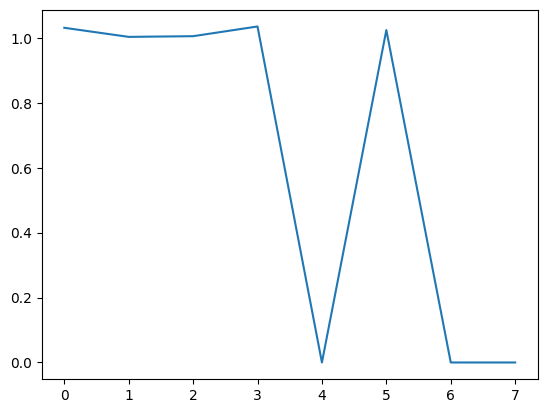

In [1]:
from pathlib import Path
from rostok.utils.result_saver import MCTSReporter


reporter = MCTSReporter.get_instance()
reporter.load_report(Path('./results/MCTS_report_22y_12m_23d_17H_35M'))

reporter.plot_means()

In [4]:
from numpy import ndarray

for item in reporter.rewards.items():
    for robot in item[1]:
        if isinstance(robot[2], ndarray):
            robot[2] = list(robot[2])
            print(type(robot[2]))
    
path = reporter.dump_results()

dump_results started


FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'results\\temp_logs'